<a href="https://colab.research.google.com/github/oekasja/Statistics-Probability-Final-Project/blob/main/linear_regression_statpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('appendicitis data.csv', on_bad_lines='skip', delimiter=';')

# Drop null values in `Diagnosis`
df.dropna(subset = ['Diagnosis'], inplace=True)

# Replace ',' with '.' in the columns `Age`, `BMI`, `WBC_Count`, and `CRP`
for col in ['Age', 'BMI', 'WBC_Count', 'CRP']:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)

# Convert the columns `Age`, `BMI`, `WBC_Count`, and `CRP` to numeric
for col in ['Age', 'BMI', 'WBC_Count', 'CRP']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create feature matrix X, including the columns `Age`, `BMI`, `WBC_Count`, `CRP`, `Alvarado_Score`, and `Paedriatic_Appendicitis_Score`
X = df[['Age', 'BMI', 'WBC_Count', 'CRP', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score']].copy()

# Create target variable y by mapping 'appendicitis' to 1 and 'no appendicitis' to 0 in the `Diagnosis` column
y = df['Diagnosis'].map({'appendicitis': 1, 'no appendicitis': 0})

# Drop rows with missing values in the feature matrix X
X.dropna(inplace=True)
y = y[X.index]  # Align y with the new X after dropping rows

# Split the data into training and testing sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model and a linear discriminant analysis model to the training data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Predict the labels on the test set for both models
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lda = lda_model.predict(X_test_scaled)

# Define the function `calculate_metrics` to calculate accuracy, sensitivity, and specificity from the confusion matrix
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return accuracy, sensitivity, specificity

# Calculate and print the accuracy, sensitivity, and specificity for both models on the test set
accuracy_lr, sensitivity_lr, specificity_lr = calculate_metrics(y_test, y_pred_lr)
accuracy_lda, sensitivity_lda, specificity_lda = calculate_metrics(y_test, y_pred_lda)

print("Logistic Regression:")
print(f"  Accuracy: {accuracy_lr:.2f}")
print(f"  Sensitivity: {sensitivity_lr:.2f}")
print(f"  Specificity: {specificity_lr:.2f}")

print("\nLinear Discriminant Analysis:")
print(f"  Accuracy: {accuracy_lda:.2f}")
print(f"  Sensitivity: {sensitivity_lda:.2f}")
print(f"  Specificity: {specificity_lda:.2f}")

# Print the coefficients of the logistic regression model
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_[0]):
    print(f"  {feature}: {coef:.3f}")

Logistic Regression:
  Accuracy: 0.72
  Sensitivity: 0.82
  Specificity: 0.60

Linear Discriminant Analysis:
  Accuracy: 0.72
  Sensitivity: 0.81
  Specificity: 0.60

Logistic Regression Coefficients:
  Age: 0.184
  BMI: -0.223
  WBC_Count: 0.405
  CRP: 0.559
  Alvarado_Score: 0.514
  Paedriatic_Appendicitis_Score: 0.190


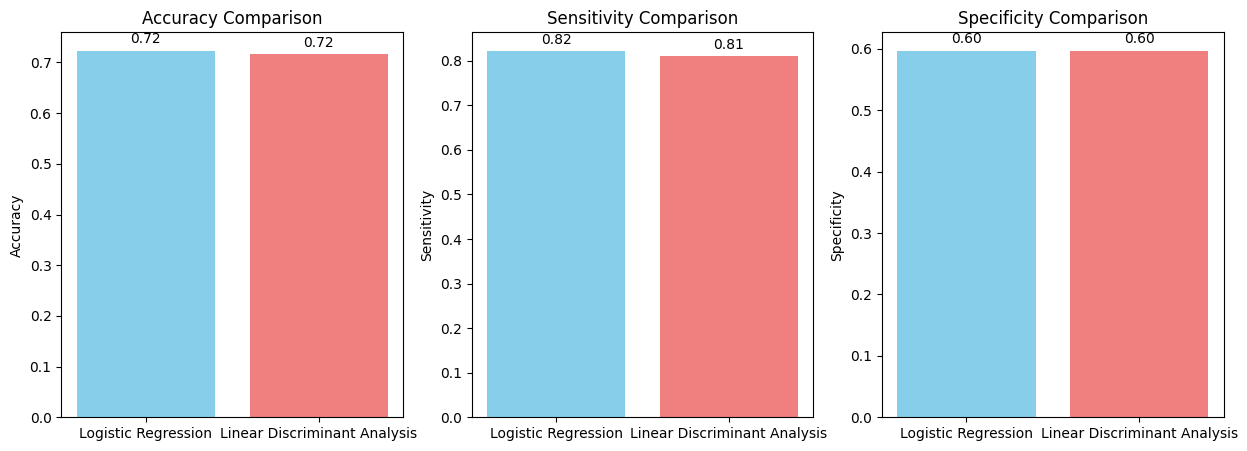

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Logistic Regression', 'Linear Discriminant Analysis']
accuracy = [accuracy_lr, accuracy_lda]
sensitivity = [sensitivity_lr, sensitivity_lda]
specificity = [specificity_lr, specificity_lda]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Accuracy plot
axs[0].bar(models, accuracy, color=['skyblue', 'lightcoral'])
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy Comparison')

# Sensitivity plot
axs[1].bar(models, sensitivity, color=['skyblue', 'lightcoral'])
axs[1].set_ylabel('Sensitivity')
axs[1].set_title('Sensitivity Comparison')

# Specificity plot
axs[2].bar(models, specificity, color=['skyblue', 'lightcoral'])
axs[2].set_ylabel('Specificity')
axs[2].set_title('Specificity Comparison')

# Add labels and show the plot
for ax in axs:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()
